#module 1- Electricity consumption by a Household

Using Linear Regression to predict the power consumption of a household

In [ ]:
import zipfile
zip_path = '/content/individual+household+electric+power+consumption.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')
import os
os.listdir('/content')
import pandas as pd

data = pd.read_csv('/content/household_power_consumption.txt', sep=';', na_values='?', low_memory=False)
print(data.head())


         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [ ]:
import pandas as pd
data = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    nrows=1000,
    na_values=['?'],
    low_memory=False
)

data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')
data.drop(columns=['Date', 'Time'], inplace=True)
data.dropna(inplace=True)
data.set_index('datetime', inplace=True)
print(data.head())
print(data.info())


                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

In [ ]:

X = data[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
y = data['Global_active_power']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 0.09777072372985263
Mean Squared Error (MSE): 0.017249350404129928
Root Mean Squared Error (RMSE): 0.13133678237314148
R^2 Score: 0.9899212769145734


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


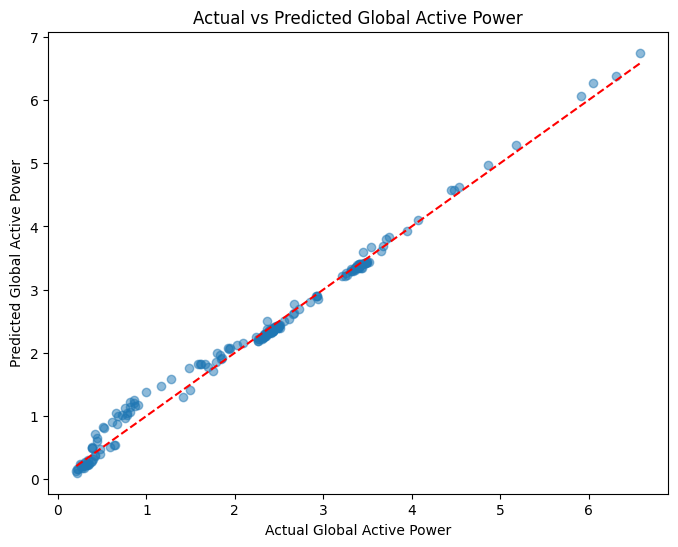

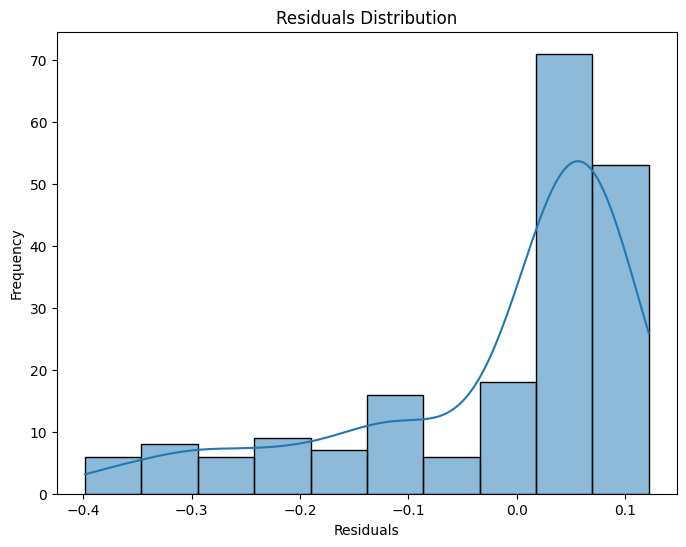

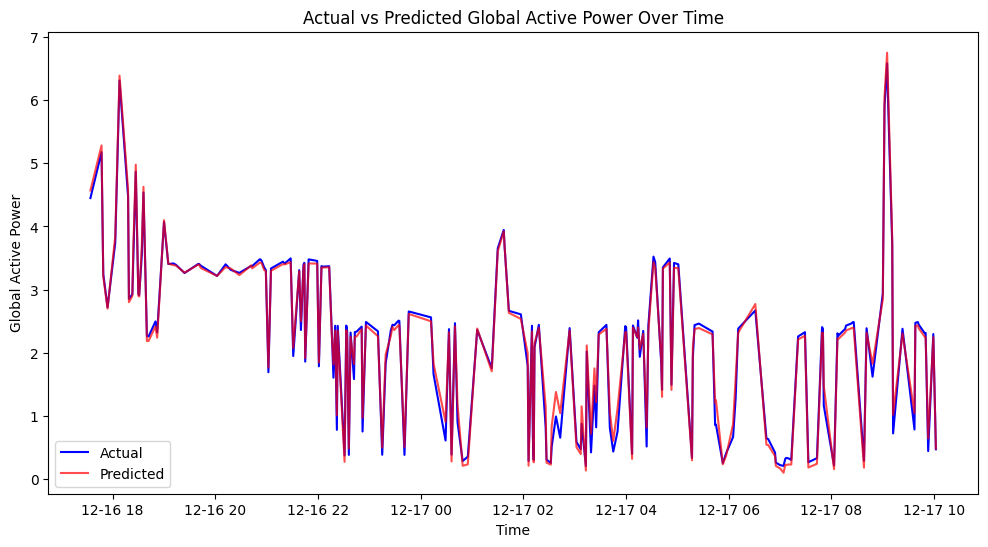

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Global Active Power')
plt.ylabel('Predicted Global Active Power')
plt.title('Actual vs Predicted Global Active Power')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

y_test_sorted = y_test.sort_index()
y_pred_sorted = pd.Series(y_pred, index=y_test.index).sort_index()

plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted.index, y_test_sorted, label='Actual', color='blue')
plt.plot(y_pred_sorted.index, y_pred_sorted, label='Predicted', color='red', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.title('Actual vs Predicted Global Active Power Over Time')
plt.legend()
plt.show()


#Maintainence of the network
LSTM to predict anomalies in the network

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [ ]:

power_data = data[['Global_active_power']].values
scaler = MinMaxScaler(feature_range=(0, 1))
power_data_scaled = scaler.fit_transform(power_data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(power_data_scaled, sequence_length)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [ ]:

split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0300 - val_loss: 0.0242
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0140 - val_loss: 0.0230
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0129 - val_loss: 0.0239
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0121 - val_loss: 0.0237
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0134 - val_loss: 0.0235
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0136 - val_loss: 0.0236
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0121 - val_loss: 0.0242
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0139 - val_loss: 0.0233
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0124 - val_loss: 0.0255
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0133 - val_loss: 0.0230
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0131 - val_loss: 0.0239
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


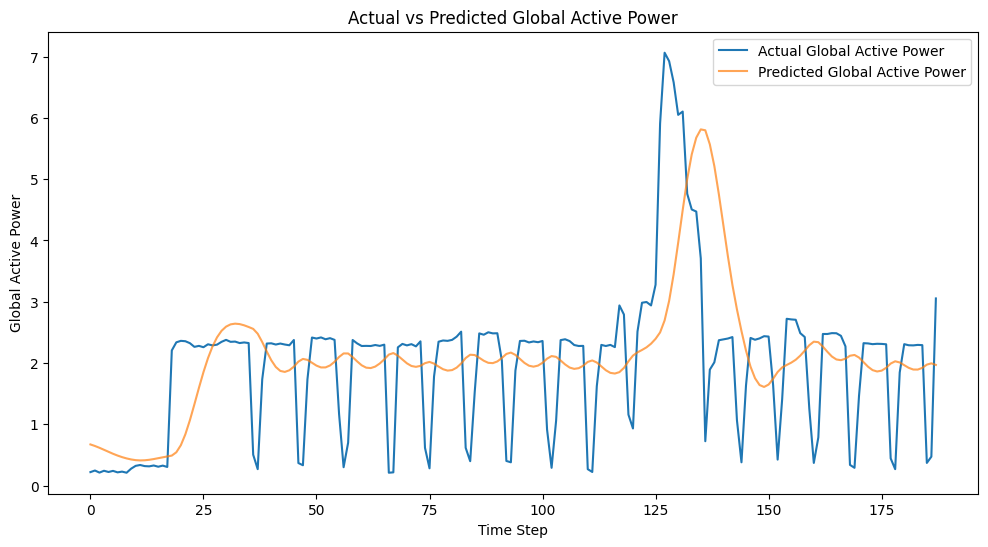

In [ ]:

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Global Active Power')
plt.plot(predictions, label='Predicted Global Active Power', alpha=0.7)
plt.xlabel('Time Step')
plt.ylabel('Global Active Power')
plt.legend()
plt.title('Actual vs Predicted Global Active Power')
plt.show()
